# Imports

In [1]:
import warnings
import pandas as pd

from sklearn.datasets import make_blobs, load_iris, load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from dstoolkit.automl.clustering import AutoMLKMeans, AutoMLGaussianMixture
from dstoolkit.model import analysis
from dstoolkit.metrics import plots

/home/junior/Documentos/GitHub/data-science-toolkit/venv/lib64/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.filterwarnings("ignore")

## Functions

In [3]:
def generate_synthetic_clustering_data(
    n_samples=2000,
    n_features=10,
    n_clusters=5,
    cluster_std=1.0,
    test_size=0.2,
    valid_size=0.2,
    random_state=42
):
    """
    Gera dados sintéticos para problemas de clusterização (agrupamento não supervisionado).
    
    Parâmetros
    ----------
    n_samples : int
        Número total de observações a serem geradas.
    n_features : int
        Número total de variáveis (dimensionalidade).
    n_clusters : int
        Número de clusters a serem simulados.
    cluster_std : float
        Desvio-padrão dos clusters (quanto maior, mais sobreposição entre eles).
    test_size : float
        Proporção da base reservada para teste.
    valid_size : float
        Proporção da base de treino reservada para validação.
    random_state : int
        Semente para reprodutibilidade.
    
    Retorna
    -------
    X_train, X_valid, X_test, y_train, y_valid, y_test : pd.DataFrame
        Bases de treino, validação e teste, com os rótulos verdadeiros dos clusters 
        (úteis apenas para avaliação, não para treinamento real de clustering).
    """

    X, y = make_blobs(
        n_samples=n_samples,
        n_features=n_features,
        centers=n_clusters,
        cluster_std=cluster_std,
        random_state=random_state
    )

    # Cria DataFrames nomeados
    feature_names = [f"feature_{i}" for i in range(n_features)]
    X = pd.DataFrame(X, columns=feature_names)
    y = pd.DataFrame(y, columns=["cluster_label"])

    # Divide em treino/teste
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Divide parte de treino em treino/validação
    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train, y_train, test_size=valid_size, random_state=random_state, stratify=y_train
    )

    return X_train, y_train, X_valid, y_valid, X_test, y_test

## Data Base

In [4]:
# X, _, _, _, _, _ = generate_synthetic_clustering_data()

In [5]:
X, y = load_wine(return_X_y=True, as_frame=True)

# Feature Engineering

In [6]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Modeling

## KMeans

In [7]:
kmeans = AutoMLKMeans()
kmeans.train(X_scaled)
kmeans.get_metrics()

,Silhouette,Calinski Harabasz,Davies-Bouldin
Train,0.284859,70.940008,1.389188


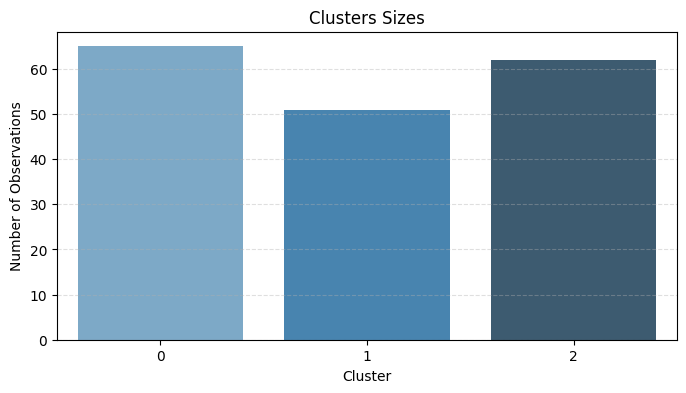

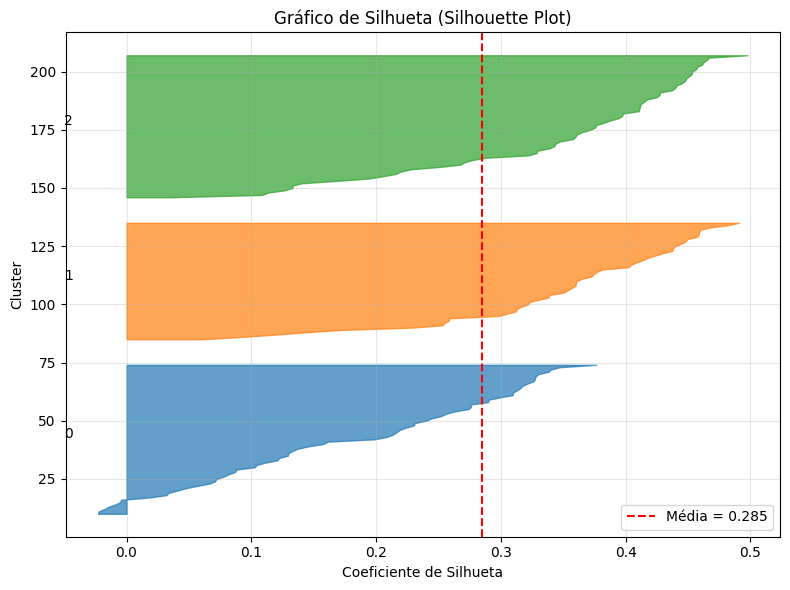

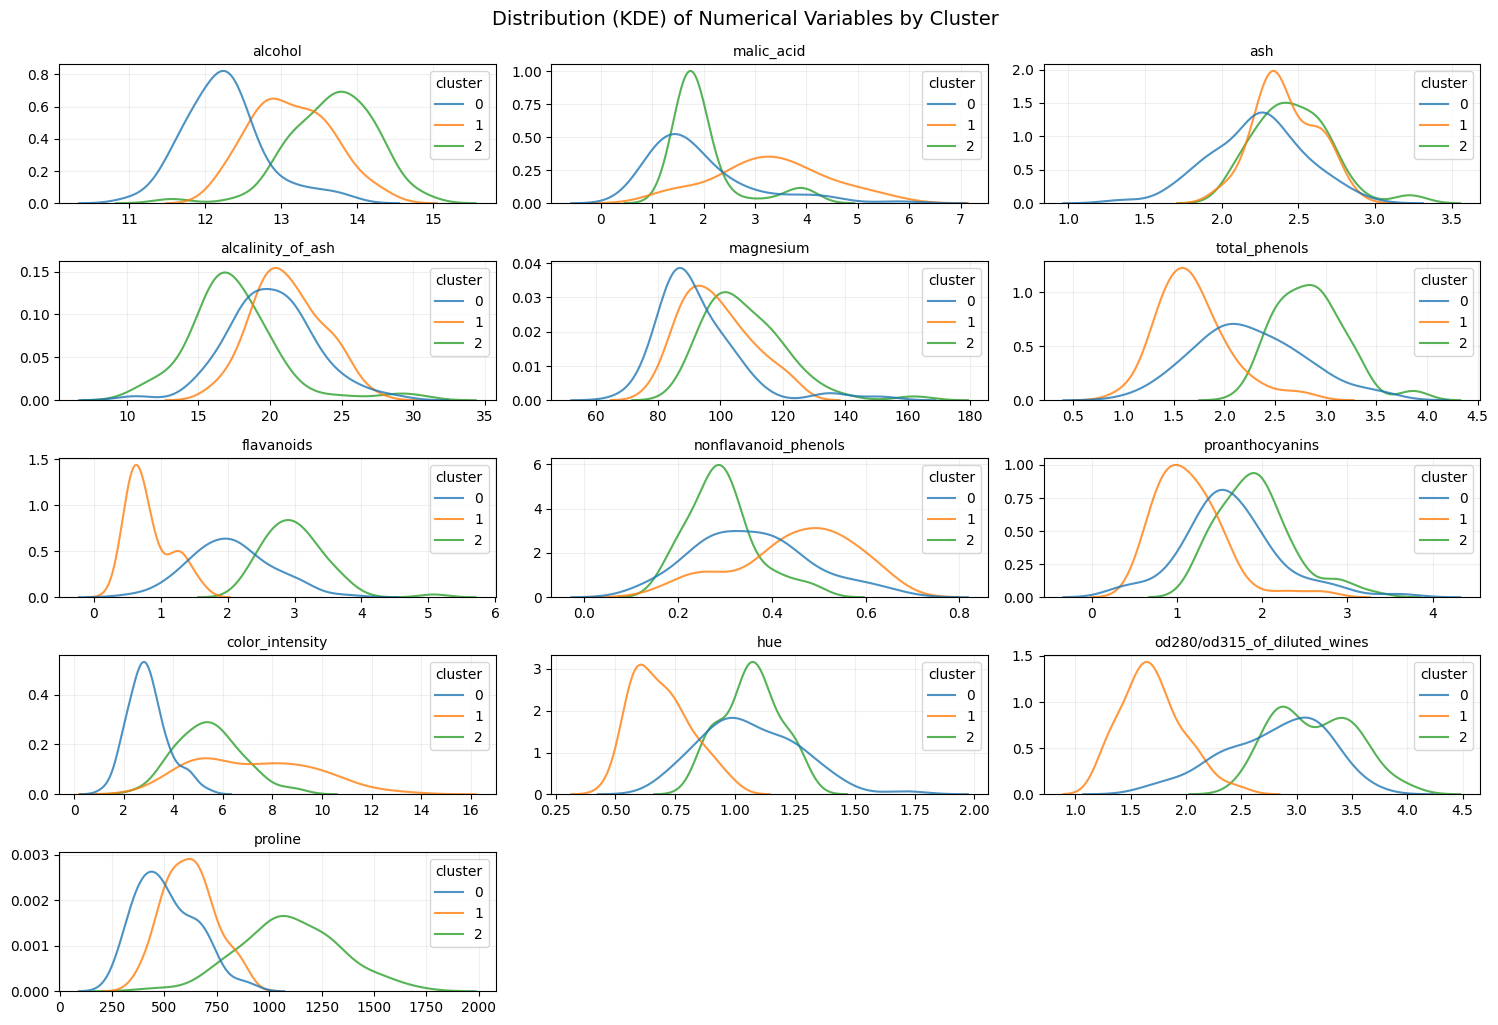

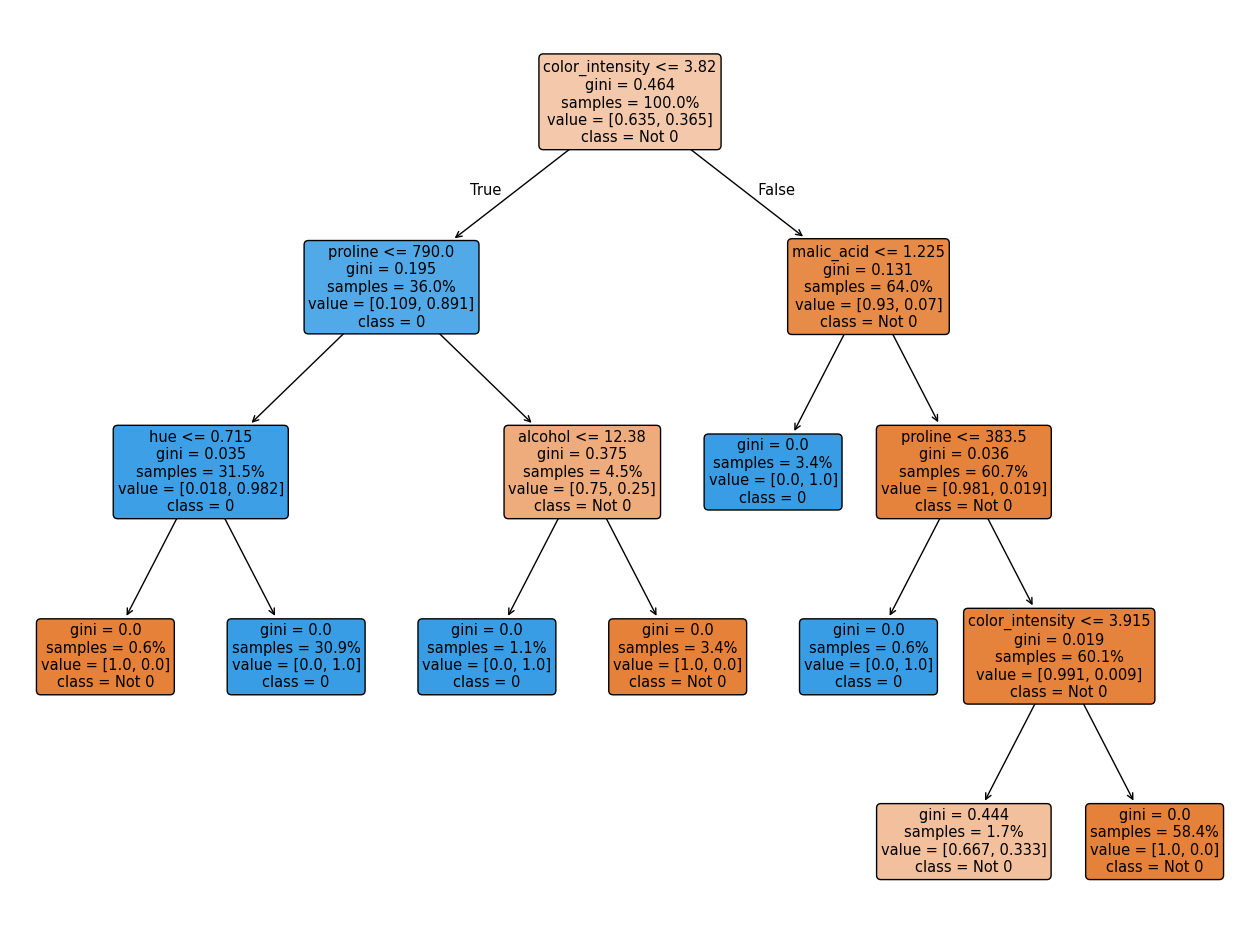

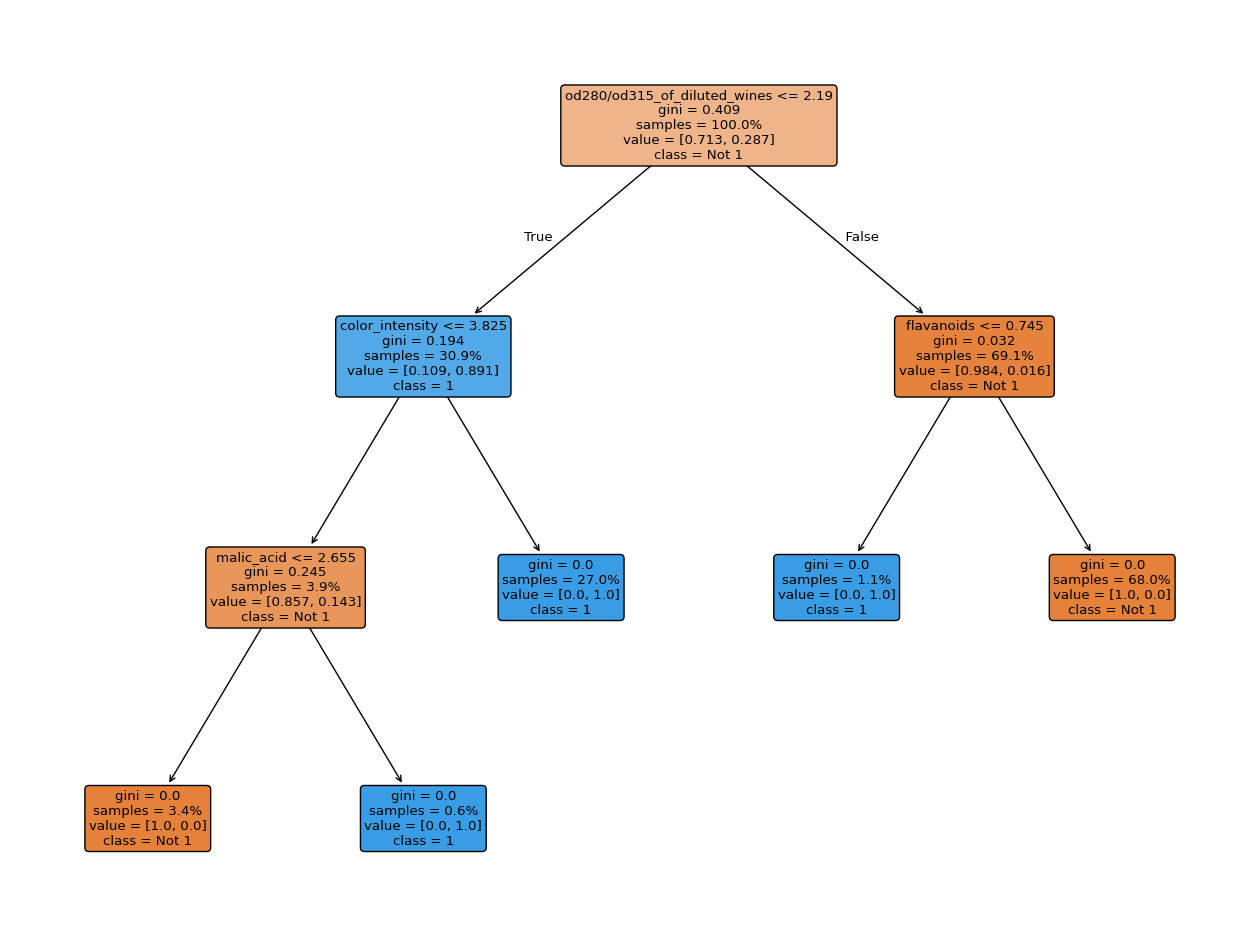

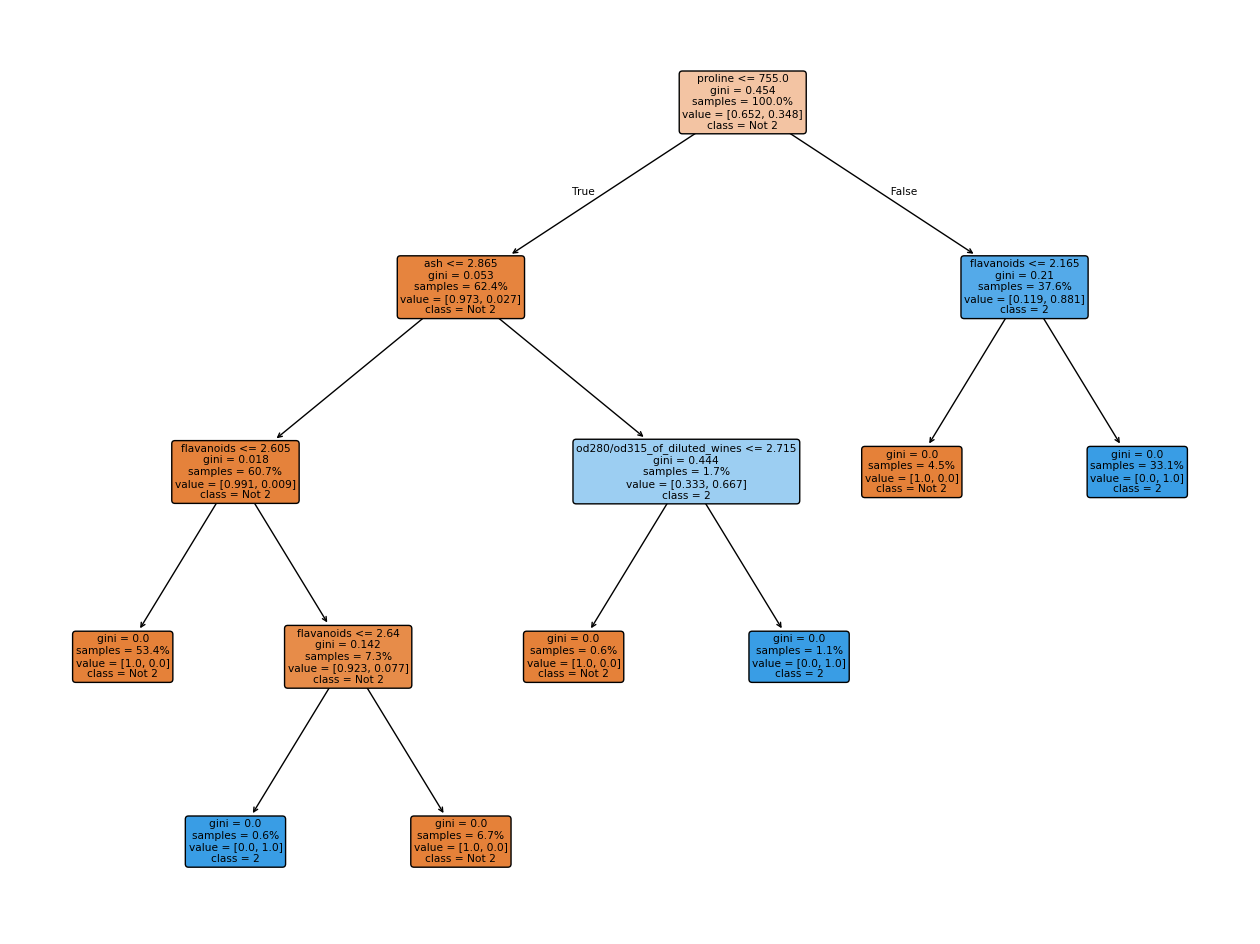

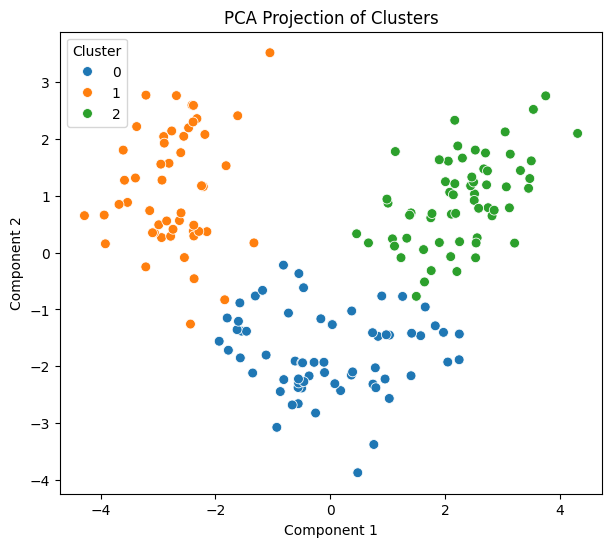

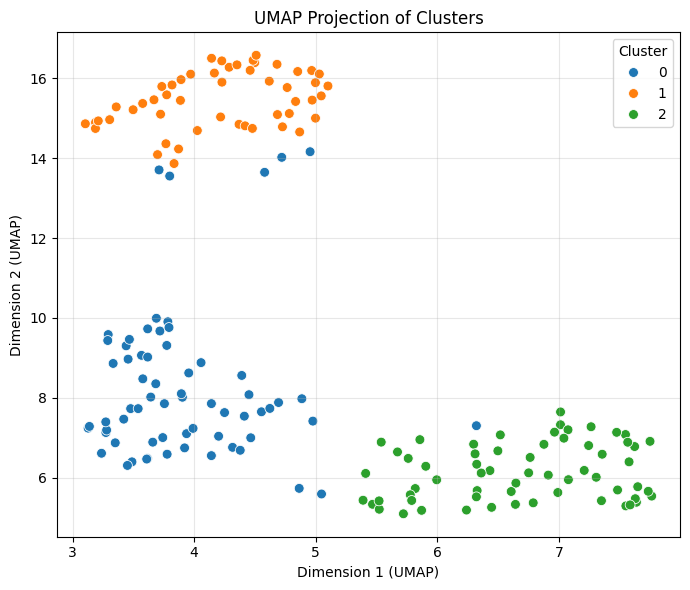

In [8]:
kmeans.analyze(X)

(<Figure size 800x400 with 1 Axes>,
 <Axes: title={'center': 'Cluster Sizes'}, xlabel='Cluster', ylabel='Number of Observations'>)

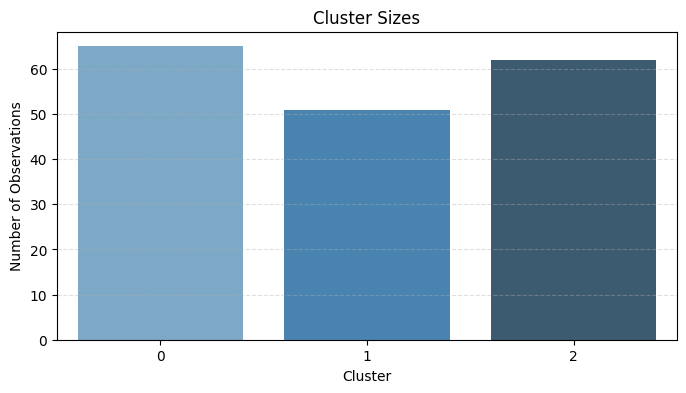

In [9]:
analysis.plot_cluster_sizes(kmeans.labels)

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Silhouette Analysis'}, xlabel='Silhouette Coefficient', ylabel='Cluster'>)

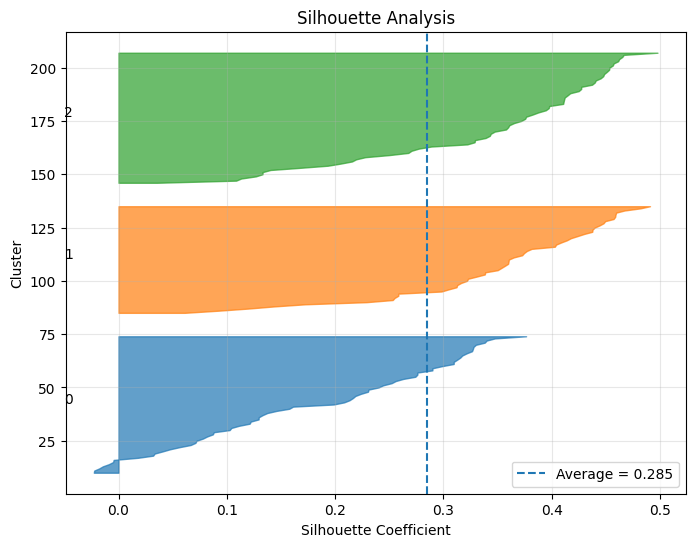

In [10]:
analysis.plot_silhouette_analysis(X_scaled, kmeans.labels)

(<Figure size 1500x1000 with 13 Axes>,
 array([<Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'malic_acid'}>,
        <Axes: title={'center': 'ash'}>,
        <Axes: title={'center': 'alcalinity_of_ash'}>,
        <Axes: title={'center': 'magnesium'}>,
        <Axes: title={'center': 'total_phenols'}>,
        <Axes: title={'center': 'flavanoids'}>,
        <Axes: title={'center': 'nonflavanoid_phenols'}>,
        <Axes: title={'center': 'proanthocyanins'}>,
        <Axes: title={'center': 'color_intensity'}>,
        <Axes: title={'center': 'hue'}>,
        <Axes: title={'center': 'od280/od315_of_diluted_wines'}>,
        <Axes: title={'center': 'proline'}>], dtype=object))

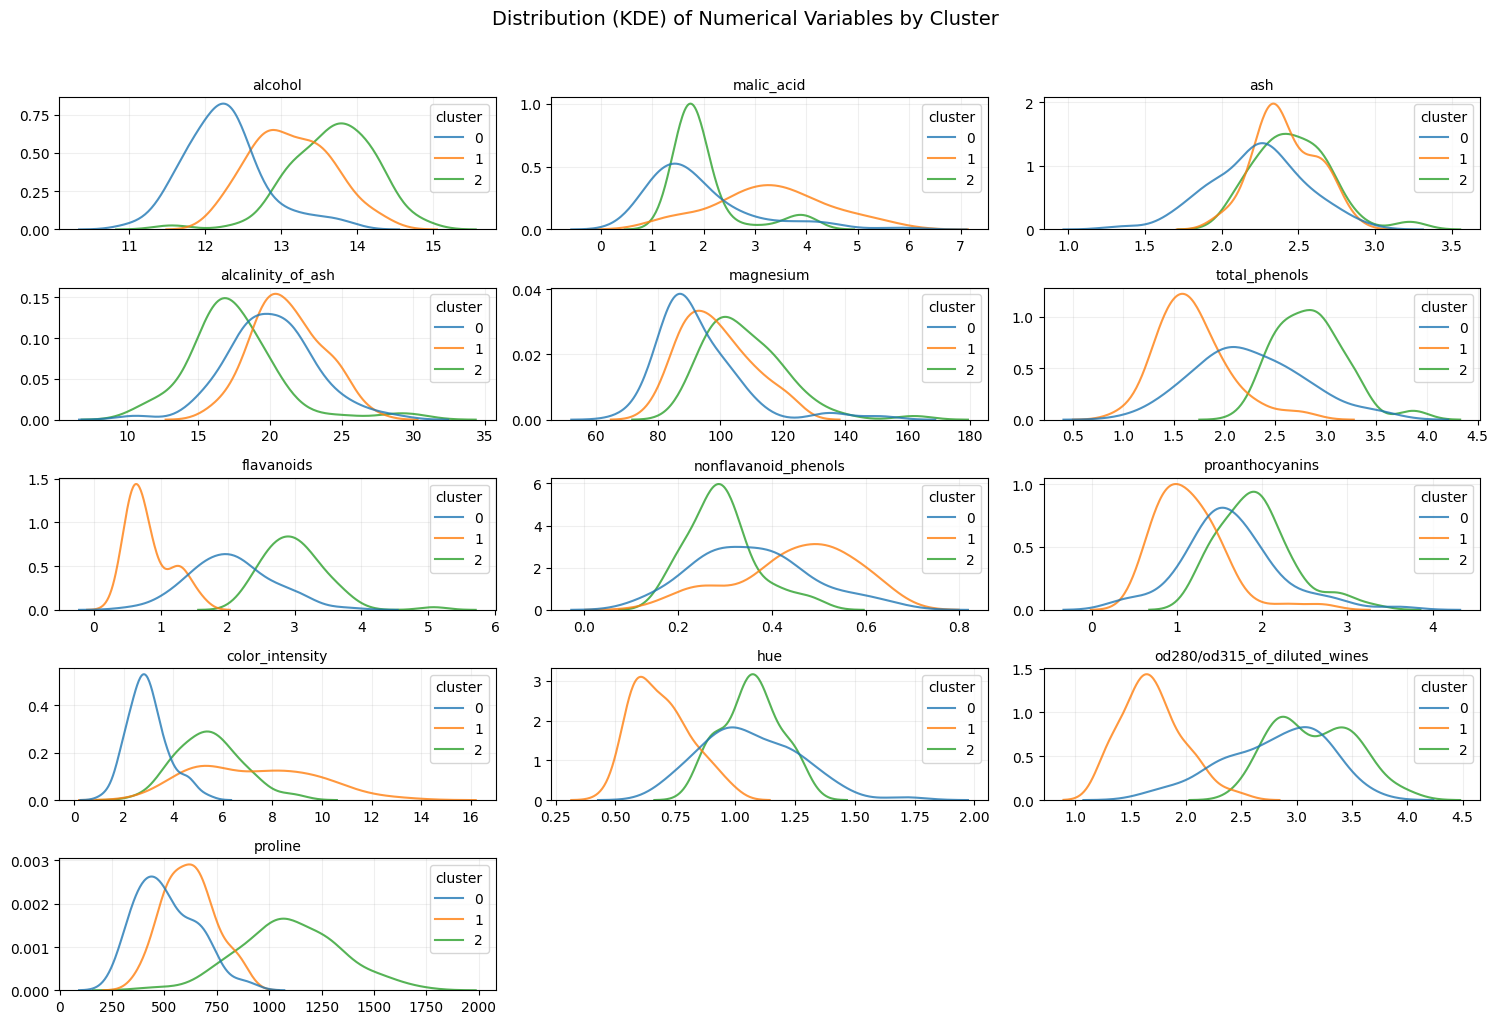

In [11]:
analysis.plot_kdeplots_by_cluster(X, kmeans.labels)

{np.int32(0): {'tree': DecisionTreeClassifier(max_depth=4, random_state=42),
  'fig': <Figure size 1600x1200 with 1 Axes>,
  'ax': <Axes: >},
 np.int32(1): {'tree': DecisionTreeClassifier(max_depth=4, random_state=42),
  'fig': <Figure size 1600x1200 with 1 Axes>,
  'ax': <Axes: >},
 np.int32(2): {'tree': DecisionTreeClassifier(max_depth=4, random_state=42),
  'fig': <Figure size 1600x1200 with 1 Axes>,
  'ax': <Axes: >}}

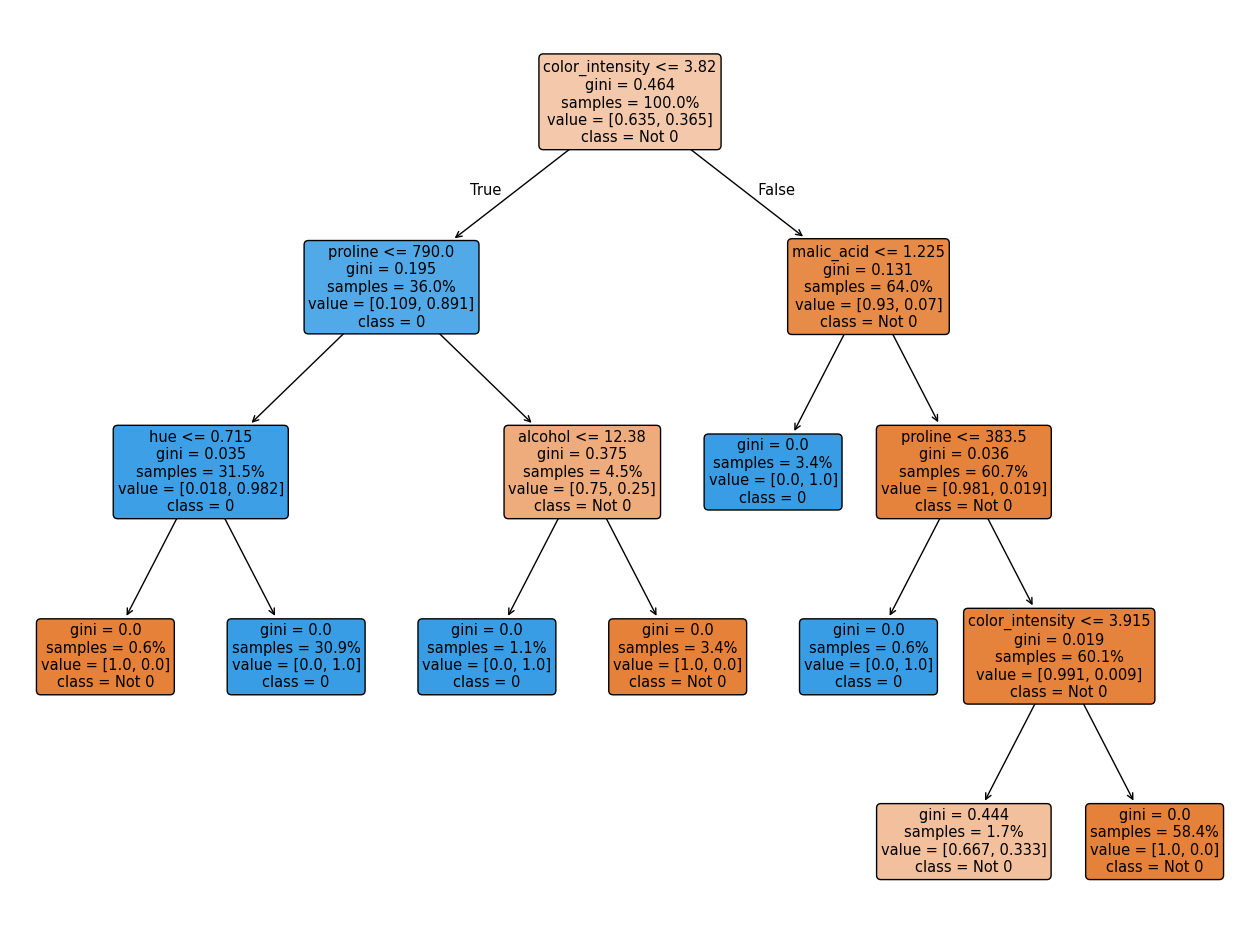

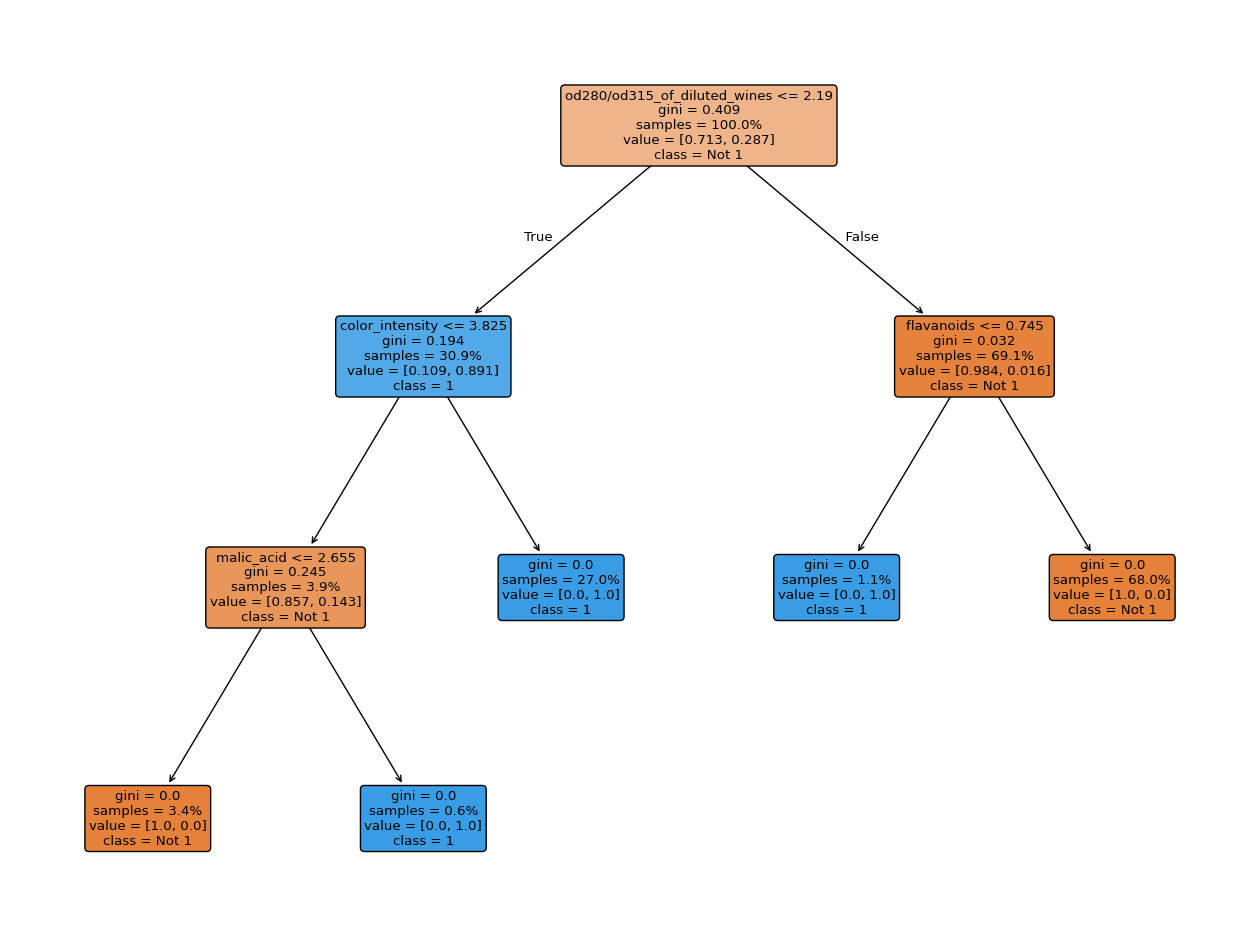

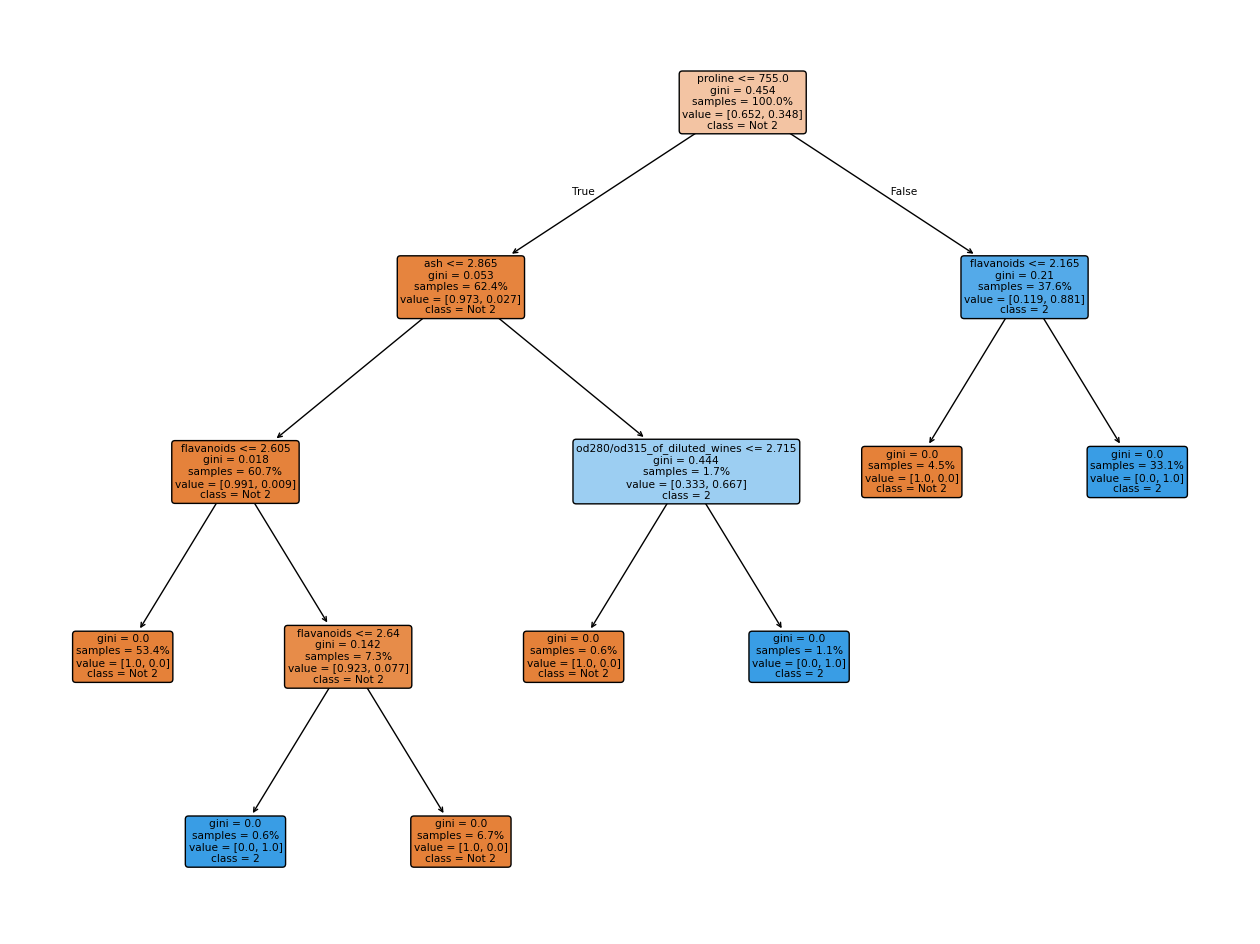

In [12]:
analysis.plot_tree_ovr(X, kmeans.labels)

(<Figure size 700x600 with 1 Axes>,
 <Axes: title={'center': 'PCA Projection of Clusters'}, xlabel='Component 1', ylabel='Component 2'>)

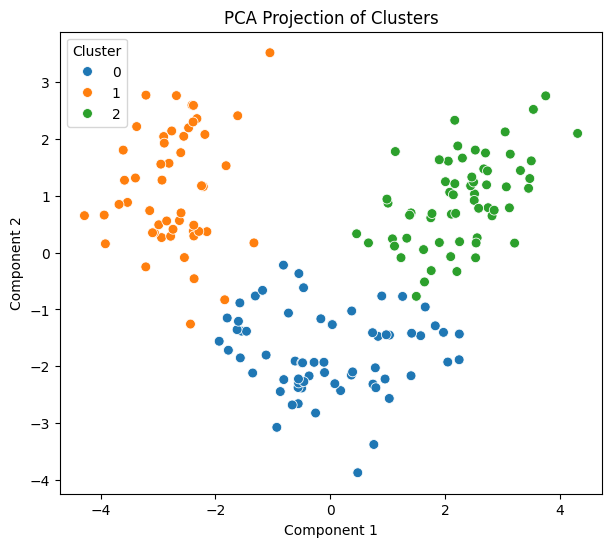

In [13]:
analysis.plot_pca_projection(X_scaled, kmeans.labels)

(<Figure size 700x600 with 1 Axes>,
 <Axes: title={'center': 'UMAP Projection of Clusters'}, xlabel='Dimension 1 (UMAP)', ylabel='Dimension 2 (UMAP)'>)

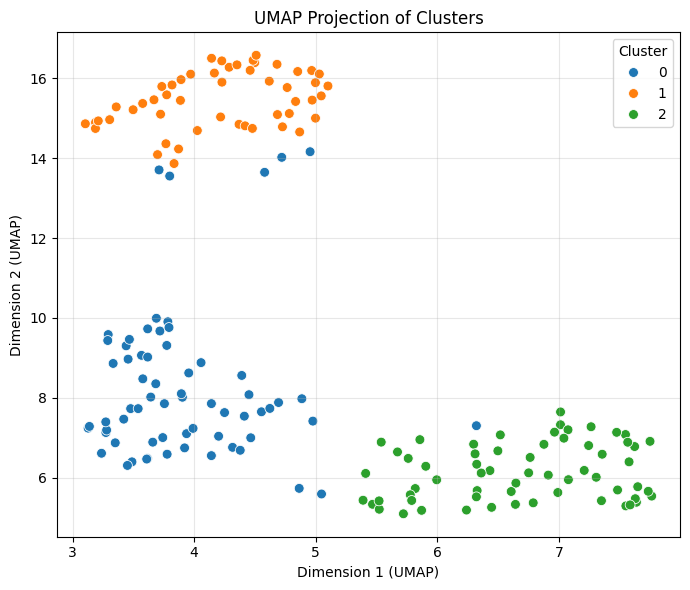

In [14]:
analysis.plot_umap_projection(X_scaled, kmeans.labels)

{(np.int32(0),
  np.int32(1)): {'model': DecisionTreeClassifier(max_depth=4, random_state=42), 'fig': <Figure size 1600x1200 with 1 Axes>, 'ax': <Axes: >},
 (np.int32(0),
  np.int32(2)): {'model': DecisionTreeClassifier(max_depth=4, random_state=42), 'fig': <Figure size 1600x1200 with 1 Axes>, 'ax': <Axes: >},
 (np.int32(1),
  np.int32(2)): {'model': DecisionTreeClassifier(max_depth=4, random_state=42), 'fig': <Figure size 1600x1200 with 1 Axes>, 'ax': <Axes: >}}

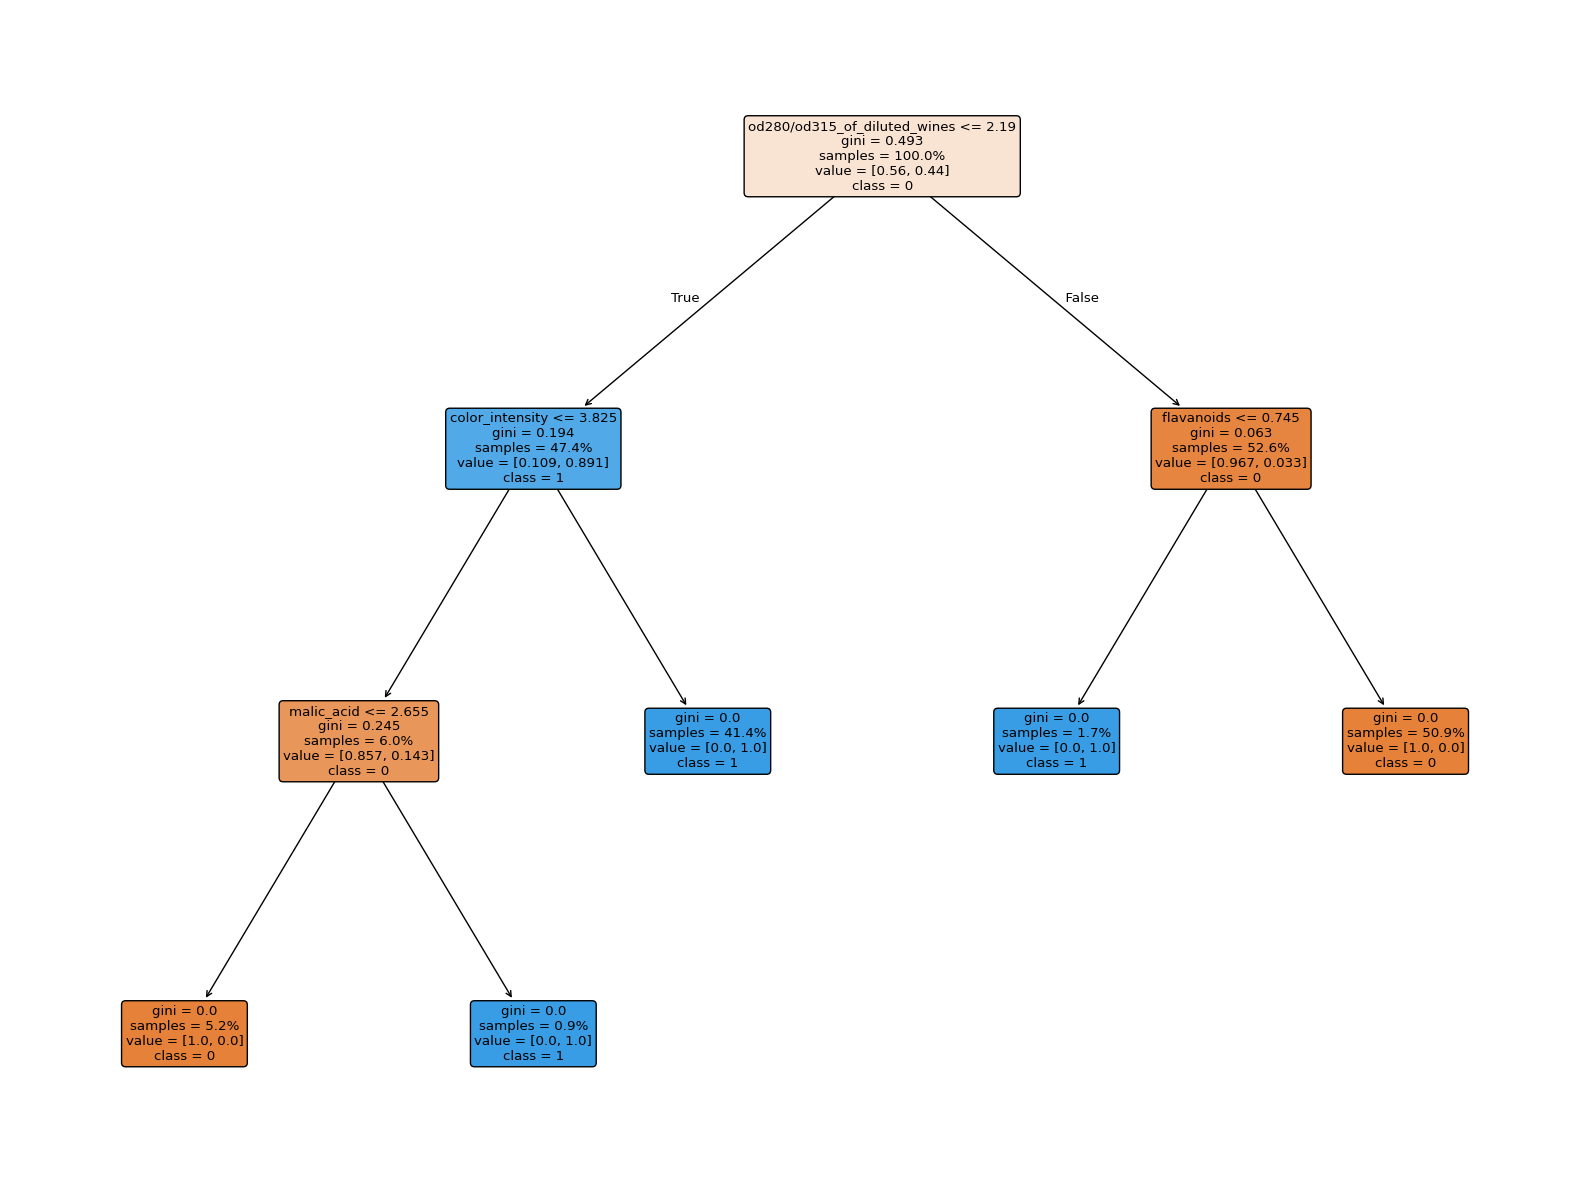

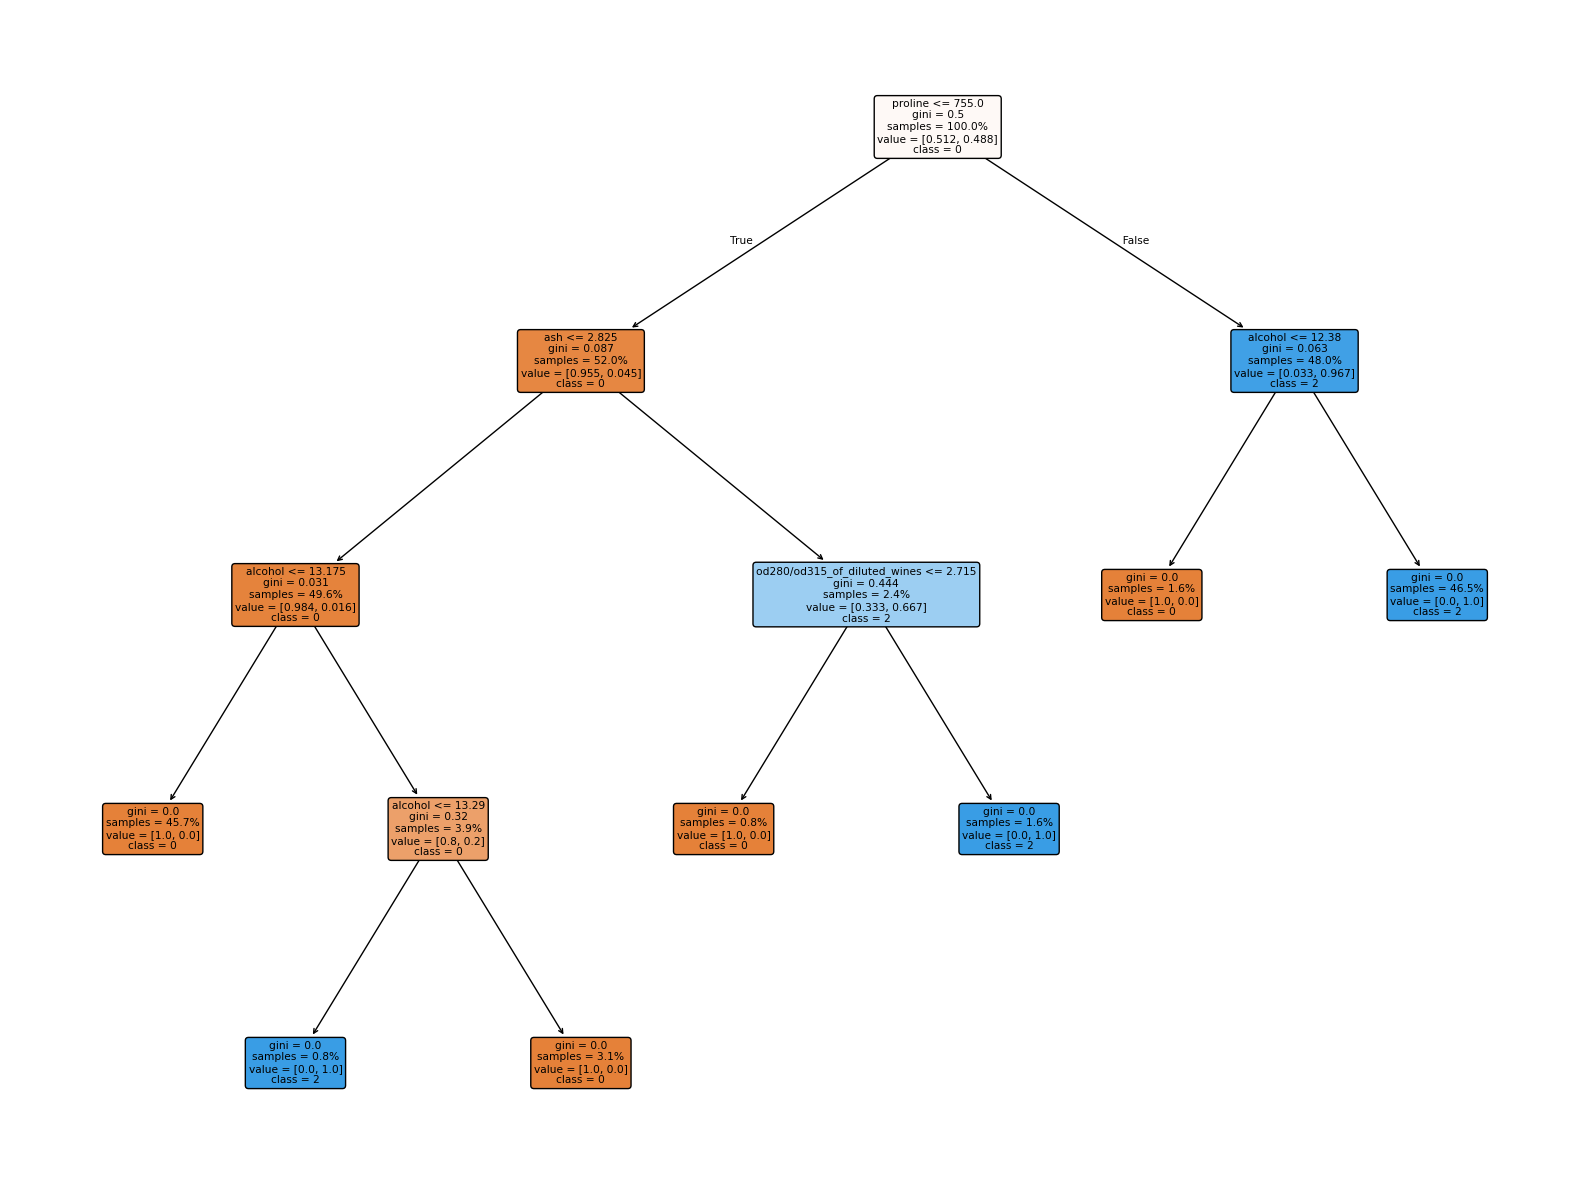

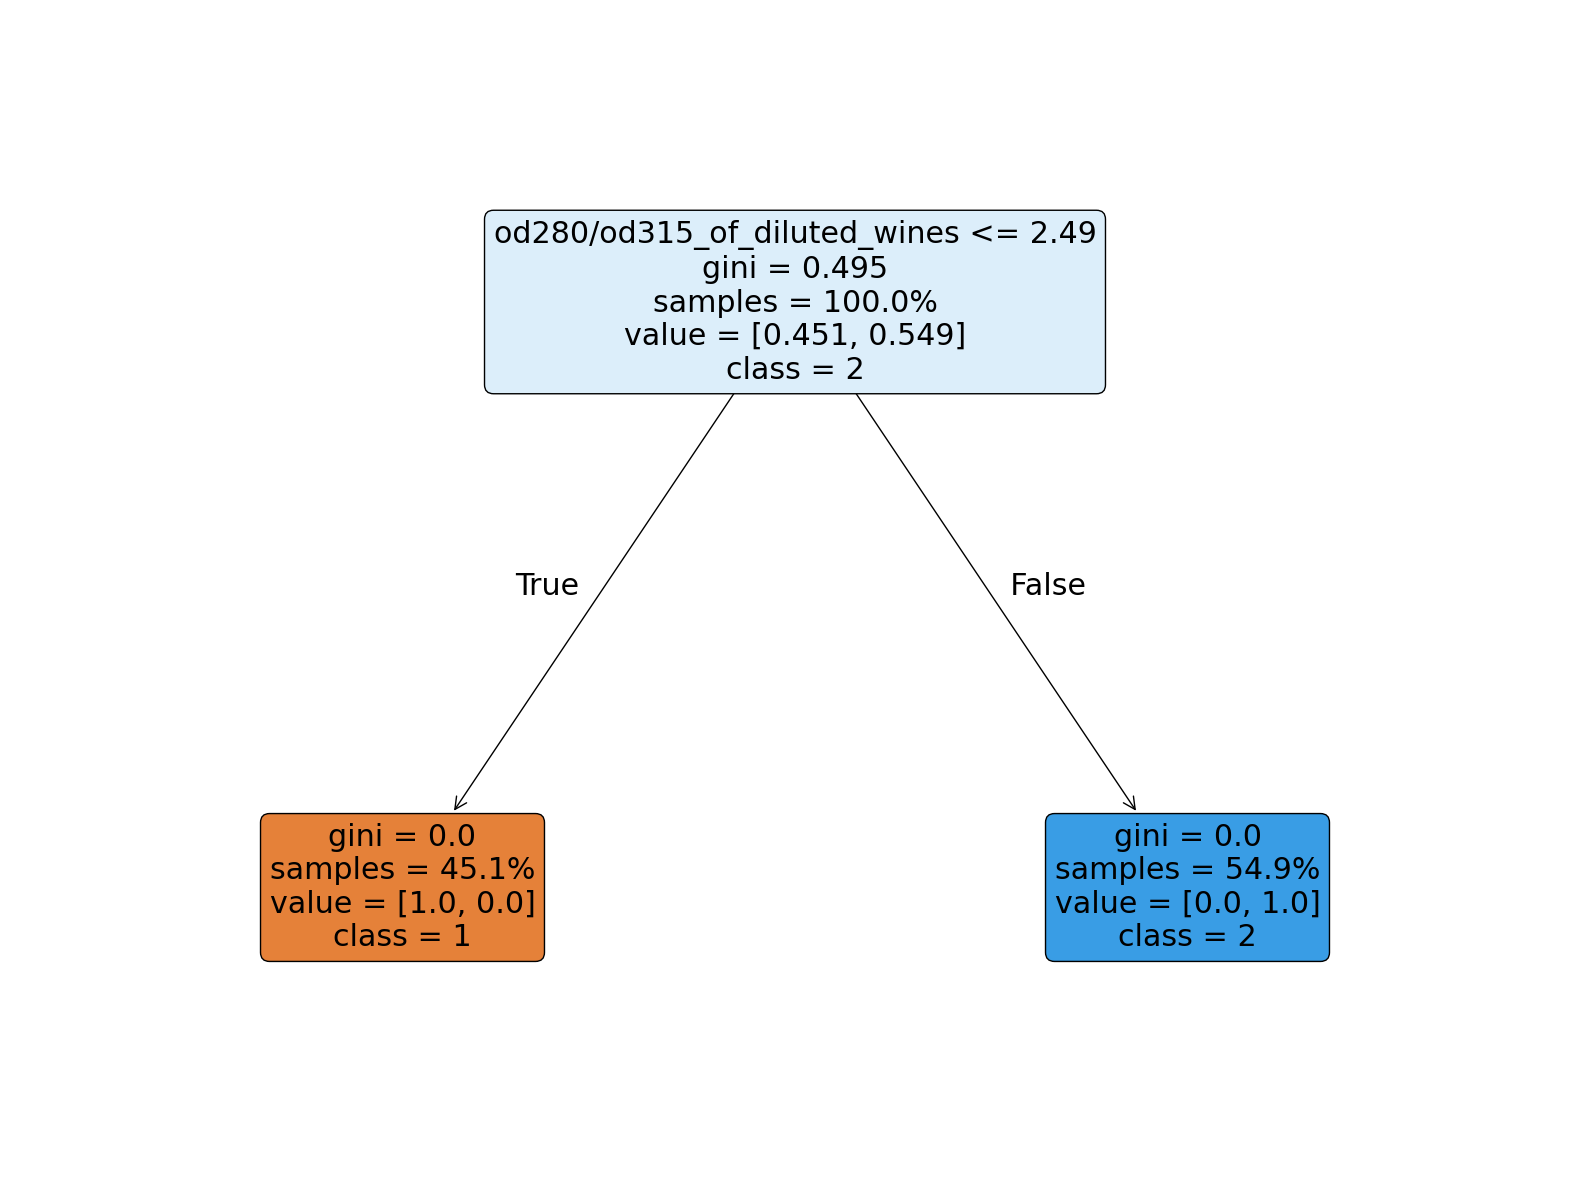

In [15]:
analysis.plot_tree_ovo(X, kmeans.labels)